In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Download NLTK data
nltk.download("stopwords")
nltk.download("punkt")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#from google.colab import files
#uploaded = files.upload()  # Upload the dataset file

# Load the dataset
df = pd.read_csv(r"C:\Users\admin\Downloads\AI_Powered_Resume_Screening_project\resume_data_1000_entries.csv")
print(df.head())


                                              Resume  \
0  AI researcher with a strong foundation in deep...   
1  Cloud architect with hands-on experience in AW...   
2  AI researcher with a strong foundation in mach...   
3  AI researcher with a strong foundation in mach...   
4  Data analyst with 9 years of experience in dee...   

                                     Job_Description  
0  Hiring a software engineer with experience in ...  
1  Looking for a data analyst with expertise in A...  
2  Hiring a software engineer with experience in ...  
3  Hiring a software engineer with experience in ...  
4  Hiring a software engineer with experience in ...  


In [3]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure all required NLTK resources are downloaded
nltk.download("stopwords")
nltk.download("punkt_tab")

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'\W', ' ', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words("english")]
    return ' '.join(tokens)

# Apply preprocessing to resumes and job descriptions
df["Resume_Cleaned"] = df["Resume"].apply(preprocess_text)
df["Job_Description_Cleaned"] = df["Job_Description"].apply(preprocess_text)

# Display preprocessed columns
print(df[["Resume_Cleaned", "Job_Description_Cleaned"]].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


                                      Resume_Cleaned  \
0  ai researcher strong foundation deep learning ...   
1  cloud architect hands experience aws azure gcp...   
2  ai researcher strong foundation machine learni...   
3  ai researcher strong foundation machine learni...   
4  data analyst 9 years experience deep learning ...   

                             Job_Description_Cleaned  
0  hiring software engineer experience cloud migr...  
1  looking data analyst expertise aws azure gcp d...  
2  hiring software engineer experience microservi...  
3  hiring software engineer experience cloud migr...  
4  hiring software engineer experience responsive...  


In [4]:
# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Combine text data for fitting the vectorizer
combined_text = df["Resume_Cleaned"].tolist() + df["Job_Description_Cleaned"].tolist()

# Fit and transform text data
vectors = tfidf.fit_transform(combined_text)

# Split the vectors into resume and job description vectors
resume_vectors = vectors[:len(df)]
job_description_vectors = vectors[len(df):]


In [5]:
# Calculate cosine similarity
similarities = cosine_similarity(resume_vectors, job_description_vectors)

# Extract diagonal values as scores
df["Similarity_Score"] = similarities.diagonal()

# View data with similarity scores
print(df[["Resume", "Job_Description", "Similarity_Score"]].head())


                                              Resume  \
0  AI researcher with a strong foundation in deep...   
1  Cloud architect with hands-on experience in AW...   
2  AI researcher with a strong foundation in mach...   
3  AI researcher with a strong foundation in mach...   
4  Data analyst with 9 years of experience in dee...   

                                     Job_Description  Similarity_Score  
0  Hiring a software engineer with experience in ...          0.222469  
1  Looking for a data analyst with expertise in A...          0.274408  
2  Hiring a software engineer with experience in ...          0.000000  
3  Hiring a software engineer with experience in ...          0.000000  
4  Hiring a software engineer with experience in ...          0.019726  


In [6]:
# Sort by similarity score
ranked_df = df.sort_values(by="Similarity_Score", ascending=False)

# Display top matches
print(ranked_df[["Resume", "Job_Description", "Similarity_Score"]].head())


                                                Resume  \
670  Cloud architect with hands-on experience in mu...   
896  Cloud architect with hands-on experience in mu...   
194  Cloud architect with hands-on experience in mu...   
123  Software engineer with 8 years of experience i...   
515  Software engineer with 1 years of experience i...   

                                       Job_Description  Similarity_Score  
670  Seeking a cloud architect with experience in m...          0.877438  
896  Seeking a cloud architect with experience in m...          0.855002  
194  Seeking a cloud architect with experience in m...          0.842446  
123  Hiring a software engineer with experience in ...          0.823498  
515  Hiring a software engineer with experience in ...          0.807695  


In [8]:
# Save the ranked results to a new CSV file
ranked_df.to_csv("ranked_resumes.csv", index=False)

print("Ranked resumes saved as ranked_resumes.csv")

#files.download("ranked_resumes.csv")

print("Ranked resumes saved and ready for download as ranked_resumes.csv")


Ranked resumes saved as ranked_resumes.csv
Ranked resumes saved and ready for download as ranked_resumes.csv


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.0 MB 5.6 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.0 MB 5.3 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.0 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.0 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 5.4 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 5.3 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.2 MB 5.0 

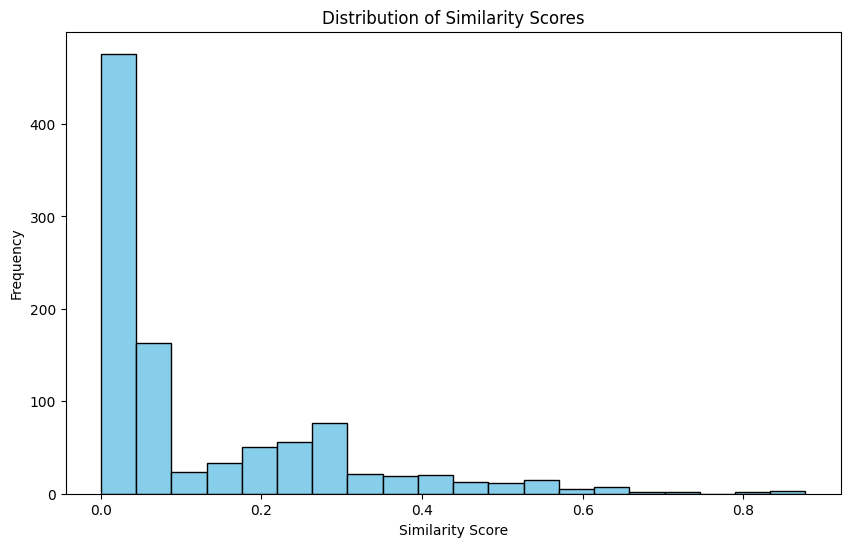

In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

# Plot similarity scores
plt.figure(figsize=(10, 6))
plt.hist(df["Similarity_Score"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()


In [11]:
!pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
  Using cached cachetools-5.5.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached tenacity-9.0.0-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached jsonschema_specifications-2024.10.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached referencing-0.35.1-py3-none-any.whl.metadata (2.8 kB)
   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.1 MB 6.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.1 MB 7.1 MB/s eta 0:00:01
   ---------------- ----------------------- 3.7/9.1 MB 6.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/9.1 MB 5.9 MB/s eta

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
2025-01-16 20:03:17.234 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 20:03:17.424 
  command:

    streamlit run C:\Users\admin\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-01-16 20:03:17.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 20:03:17.424 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-16 20:03:17.431 Thread 'MainThread': missing ScriptRunContext! This warning can be ign